### 4. Use Naive Bayes to perform sentiment analysis.
#a) Pre-processing text using NLP.

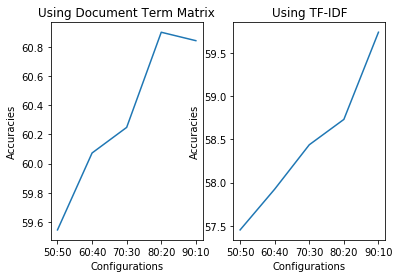

In [11]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("train.tsv", sep = '\t')
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words="english", tokenizer = token.tokenize)
text_counts_1 = cv.fit_transform(data['Phrase'])
sizes = [0.5,0.6,0.7,0.8,0.9]
model = MultinomialNB()
accuracy_1 = []
for size in sizes:
    X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(text_counts_1, data['Sentiment'], train_size = size)
    model.fit(X_train_1,Y_train_1)
    Y_predict_1 = model.predict(X_test_1)
    accuracy_1.append(metrics.accuracy_score(Y_test_1,Y_predict_1)*100)

tf = TfidfVectorizer()
text_counts_2 = tf.fit_transform(data['Phrase'])
accuracy_2 = []
for size in sizes:
    X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(text_counts_2, data['Sentiment'], train_size = size)
    model.fit(X_train_2,Y_train_2)
    Y_predict_2 = model.predict(X_test_2)
    accuracy_2.append(metrics.accuracy_score(Y_test_2,Y_predict_2)*100)
    
config = ['50:50','60:40','70:30','80:20','90:10']
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(config,accuracy_1)
ax1.set(xlabel = 'Configurations', ylabel = 'Accuracies')
ax1.set_title('Using Document Term Matrix')

ax2.plot(config,accuracy_2)
ax2.set(xlabel = 'Configurations', ylabel = 'Accuracies')
ax2.set_title('Using TF-IDF')
plt.show()